# importing necessary libraries

In [292]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
df=pd.read_csv("salary.csv")

In [294]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


#  Analysis
rank: it describes the position or the rank of the inidviduals
discipline: it refers to the discipline at which the individual is
yrs.since.phd: it refers to how many years have passed since the completion of Phd of individuals
yrs.service: it describes the years of service
sex: it mentions the gender of the inidviduals
salary: it describes the salary of the inidviduals and it is the target variable because it depends on the other independent variables in the data frame

In [4]:
df.head(15)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [5]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

analysis: from the above code it can be seen that the columns rank, discipline and sex are of object type and rest, yrs.since.phd, yrs.service and salary are int type.


dataframe description: in the dataframe, the columns of ranks, sex, discipline, yrs.since.phd, yrs.service are the independent columns and the salary is the target variable or column

In [216]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

outcome: from the above code the analysis that can be drawn is that there are no null values in any column of the dataset

In [217]:
df.shape

(397, 6)

In [218]:
df.isnull().sum().sum()

0

# Analysis: 
it shows that there are no null values in the data frame

# Univariate analysis

In [9]:
df["discipline"].value_counts()

B    216
A    181
Name: discipline, dtype: int64

outcome: in the dataframe, there are 216 data on rank B and 181 of rank A

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

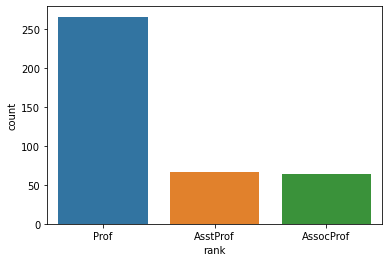

In [10]:
sns.countplot(df['rank'])
df["rank"].value_counts()

outcome: it can be seen that in the rank column, 266 data are professor, 67 are asst professor and 64 are associate professor

Male      358
Female     39
Name: sex, dtype: int64

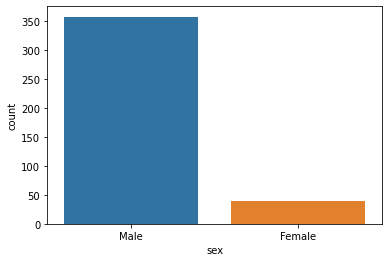

In [11]:
sns.countplot(df['sex'])
df["sex"].value_counts()

outcome: in the dataframe, number of male is relatively higher than female

# encoding

In [219]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [220]:
le=LabelEncoder()

In [295]:
list=['rank','sex','discipline']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

In [296]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


analysis:
in the rank column, 0 represents Associate professor, 1 for assistant professor and 2 for professor
in the sex column, 0 represents female and 1 represents male
in the discipline column, 1 represents discipline B and 0 represents discipline A

In [297]:
df["rank"]=df["rank"].astype(int)
df["sex"]=df["sex"].astype(int)
df["discipline"]=df["discipline"].astype(int)

In [298]:
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

# Descriptive statistics

In [299]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [226]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

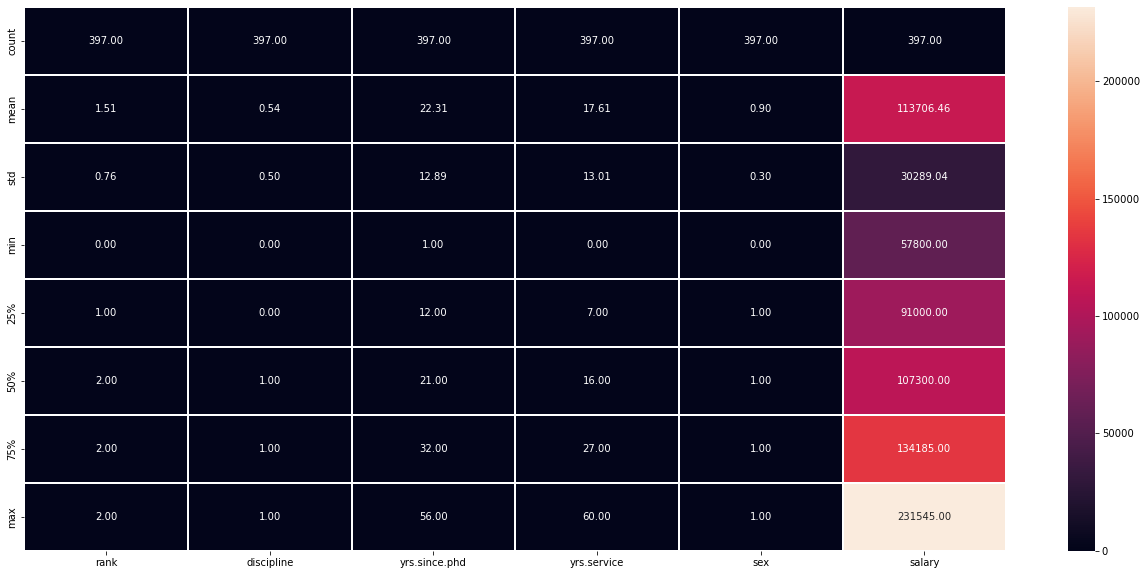

In [227]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,fmt="0.2f")
plt.show()

# to check for correlation between the target column and the feature columns

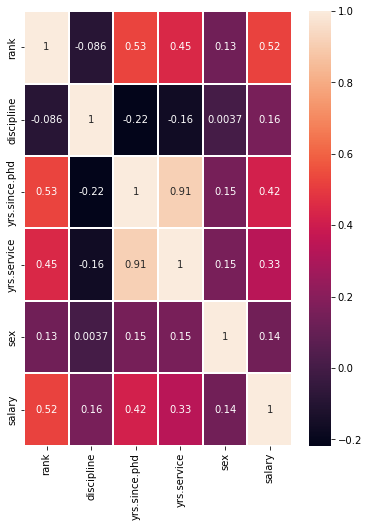

In [228]:
plt.figure(figsize=(6,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)
plt.show()

In [331]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

analysis:
rank is 52 percent positively correlated with salary
discipline is 16 percent positively correlated with salary
yrs since phd is 42 percent positively correlated with salary
yrs. service is 33 percent positively correlated with salary
sex is 14 percent positively correlated with salary
it can be seen that the sex column has weak correlation with the target variable so we can drop it

In [354]:
df.drop('sex',inplace=True,axis=1)

In [355]:
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# for removing outliers

rank                AxesSubplot(0.125,0.125;0.133621x0.755)
discipline       AxesSubplot(0.285345,0.125;0.133621x0.755)
yrs.since.phd     AxesSubplot(0.44569,0.125;0.133621x0.755)
yrs.service      AxesSubplot(0.606034,0.125;0.133621x0.755)
salary           AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

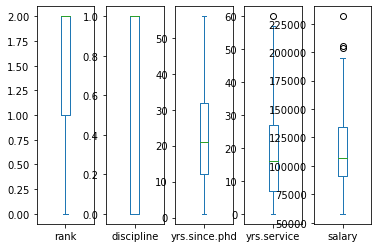

In [356]:
df.plot(kind="box",subplots=True)

In [357]:
z=np.abs(zscore(df))

In [358]:
z

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0.649257,0.915403,0.257550,0.029669,0.860919
1,0.649257,0.915403,0.179854,0.124300,1.966672
2,0.672564,0.915403,1.422982,1.125098,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.918768
...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.350418
393,0.649257,1.092415,0.674796,0.106654,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.607502


In [359]:
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


to check for outliers:
in this dataframe outliers will not be removed because the data will become biased as it is not considering the case of discipline column

In [360]:
df.shape

(397, 5)

# splitting of the dataframe

In [361]:
x=df.drop("salary",axis=1)

In [362]:
x

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41
...,...,...,...,...
392,2,0,33,30
393,2,0,31,19
394,2,0,42,25
395,2,0,25,15


In [363]:
y=df["salary"]

In [364]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [365]:
x.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
dtype: float64

analysis: skewness need not to be removed because for the integer continous column of yrs.service.phd and yrs.service is in the acceptable range of +/-0.65.

# removal of skewness in data

for scaling of data we will use power transform method

In [366]:
import sklearn
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
a=pt.fit_transform(x)

In [368]:
dfn=pd.DataFrame(data=a,columns=['rank','discipline','yrs.since.phd','yrs.service'])
dfn.skew()

rank            -0.830409
discipline      -0.177684
yrs.since.phd   -0.132757
yrs.service     -0.122152
dtype: float64

from the dataframe skewness has been removed to some extent using power transformer

In [369]:
x=dfn
x

,rank,discipline,yrs.since.phd,yrs.service
0,0.690051,0.915403,-0.127295,0.250619
1,0.690051,0.915403,-0.049178,0.105112
2,-1.091536,0.915403,-1.628121,-1.288032
3,0.690051,0.915403,1.565162,1.416860
4,0.690051,0.915403,1.279680,1.506524
...,...,...,...,...
392,0.690051,-1.092415,0.854260,0.976667
393,0.690051,-1.092415,0.726155,0.320003
394,0.690051,-1.092415,1.395525,0.698789
395,0.690051,-1.092415,0.320172,0.028567


In [370]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

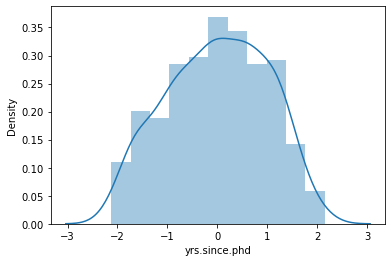

In [371]:
sns.distplot(x['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

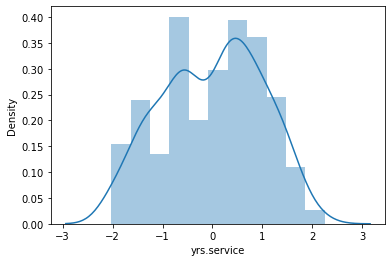

In [372]:
sns.distplot(x['yrs.service'])

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [374]:
def model_selection(instance):
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        print(f"at random state {i}, training accuracy is {r2_score(y_train,pred_train)}")
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print("\n")
     

In [375]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)


at random state 0, training accuracy is 0.4010299212148648
at random state 0, testing accuracy is 0.4469264959387038


at random state 1, training accuracy is 0.39781078447736207
at random state 1, testing accuracy is 0.4676284111703447


at random state 2, training accuracy is 0.41550414698291993
at random state 2, testing accuracy is 0.3939344523783026


at random state 3, training accuracy is 0.4305828920147253
at random state 3, testing accuracy is 0.3465384987943163


at random state 4, training accuracy is 0.42562712131234104
at random state 4, testing accuracy is 0.3398962250256352


at random state 5, training accuracy is 0.43157219558324955
at random state 5, testing accuracy is 0.32644051353198544


at random state 6, training accuracy is 0.40010761310234955
at random state 6, testing accuracy is 0.46400087281768554


at random state 7, training accuracy is 0.3950488124647219
at random state 7, testing accuracy is 0.4885159698268562


at random state 8, training accuracy is 0

at random state 69, training accuracy is 0.39394895966110444
at random state 69, testing accuracy is 0.4635125847427295


at random state 70, training accuracy is 0.4411792607336926
at random state 70, testing accuracy is 0.19824545110958236


at random state 71, training accuracy is 0.4202325048893282
at random state 71, testing accuracy is 0.3639689156322702


at random state 72, training accuracy is 0.4173471413315034
at random state 72, testing accuracy is 0.35977440595700905


at random state 73, training accuracy is 0.4100386494513083
at random state 73, testing accuracy is 0.4087938941631861


at random state 74, training accuracy is 0.40365555252037244
at random state 74, testing accuracy is 0.44881845197956116


at random state 75, training accuracy is 0.4074691101196105
at random state 75, testing accuracy is 0.42107357525152456


at random state 76, training accuracy is 0.4283816797156613
at random state 76, testing accuracy is 0.2864798014500467


at random state 77, traini

for decision tree regressor

In [376]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
dtr=DecisionTreeRegressor()
model_selection(dtr)

at random state 0, training accuracy is 0.9143985137073789
at random state 0, testing accuracy is -0.1447597576573343


at random state 1, training accuracy is 0.9088708470812242
at random state 1, testing accuracy is -0.19280451096769746


at random state 2, training accuracy is 0.9140787091802494
at random state 2, testing accuracy is 0.18844743845850498


at random state 3, training accuracy is 0.9190786583193563
at random state 3, testing accuracy is -0.12727262829052344


at random state 4, training accuracy is 0.9130024835164539
at random state 4, testing accuracy is 0.07021807598202823


at random state 5, training accuracy is 0.947859835039783
at random state 5, testing accuracy is 0.12347060959009892


at random state 6, training accuracy is 0.9102473216261049
at random state 6, testing accuracy is 0.18187206508669862


at random state 7, training accuracy is 0.9095134585178943
at random state 7, testing accuracy is -0.38077871600350455


at random state 8, training accuracy i

at random state 89, training accuracy is 0.9130815820833275
at random state 89, testing accuracy is 0.08775475177296421


at random state 90, training accuracy is 0.9436338075567978
at random state 90, testing accuracy is -0.1742284626886006


at random state 91, training accuracy is 0.953974432574869
at random state 91, testing accuracy is 0.1648489524160056


at random state 92, training accuracy is 0.9150028199211968
at random state 92, testing accuracy is -0.030514738529983987


at random state 93, training accuracy is 0.9221604476022217
at random state 93, testing accuracy is -0.019280390817081106


at random state 94, training accuracy is 0.9086368177451322
at random state 94, testing accuracy is -0.2816094348317595


at random state 95, training accuracy is 0.9329928906576853
at random state 95, testing accuracy is -0.08177073710809069


at random state 96, training accuracy is 0.9063576560975277
at random state 96, testing accuracy is 0.4924877134244454


at random state 97, tr

Kneighborsregressor model

In [330]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, training accuracy is 0.6279276439546992
at random state 0, testing accuracy is 0.43659912891745123


at random state 1, training accuracy is 0.640600598767155
at random state 1, testing accuracy is 0.338293921827967


at random state 2, training accuracy is 0.6317564700881706
at random state 2, testing accuracy is 0.35917491935503343


at random state 3, training accuracy is 0.6262299209316748
at random state 3, testing accuracy is 0.40570889837923607


at random state 4, training accuracy is 0.6215352116537922
at random state 4, testing accuracy is 0.4448510438031179


at random state 5, training accuracy is 0.6263387012187747
at random state 5, testing accuracy is 0.41742413924813904


at random state 6, training accuracy is 0.6011779749644026
at random state 6, testing accuracy is 0.5338383533699207


at random state 7, training accuracy is 0.6197068491265958
at random state 7, testing accuracy is 0.3409097799568873


at random state 8, training accuracy is 0.6234

at random state 70, training accuracy is 0.6291251547862664
at random state 70, testing accuracy is 0.4373974028003549


at random state 71, training accuracy is 0.6400296229379073
at random state 71, testing accuracy is 0.3491450135426626


at random state 72, training accuracy is 0.6550863718421707
at random state 72, testing accuracy is 0.4171925933312999


at random state 73, training accuracy is 0.6313038087503482
at random state 73, testing accuracy is 0.5167669131742381


at random state 74, training accuracy is 0.6152772061943322
at random state 74, testing accuracy is 0.5551558787896862


at random state 75, training accuracy is 0.6428037360572764
at random state 75, testing accuracy is 0.4256428932018056


at random state 76, training accuracy is 0.6236406060934994
at random state 76, testing accuracy is 0.42690758225353187


at random state 77, training accuracy is 0.6199129779895969
at random state 77, testing accuracy is 0.4330670535911384


at random state 78, training ac

In [377]:
from sklearn.svm import SVR
svr=SVR()
model_selection(svr)

at random state 0, training accuracy is -0.043456875597829736
at random state 0, testing accuracy is 0.0008303772692610512


at random state 1, training accuracy is -0.03969517617892504
at random state 1, testing accuracy is -0.08571531846415992


at random state 2, training accuracy is -0.0308206291123283
at random state 2, testing accuracy is -0.031788182094873996


at random state 3, training accuracy is -0.04644900979542821
at random state 3, testing accuracy is -0.04637871410721428


at random state 4, training accuracy is -0.03502757651217059
at random state 4, testing accuracy is -0.09464354008510112


at random state 5, training accuracy is -0.047933044013037884
at random state 5, testing accuracy is 0.0005788609026691205


at random state 6, training accuracy is -0.04018087062709497
at random state 6, testing accuracy is -0.08066034110797782


at random state 7, training accuracy is -0.0416409796300945
at random state 7, testing accuracy is -0.05118485058871336


at random sta


at random state 66, training accuracy is -0.057050801620513125
at random state 66, testing accuracy is -0.007362576829916145


at random state 67, training accuracy is -0.03825670410454096
at random state 67, testing accuracy is -0.051909708032969126


at random state 68, training accuracy is -0.031548593588499596
at random state 68, testing accuracy is -0.11665273736668103


at random state 69, training accuracy is -0.05406997958341453
at random state 69, testing accuracy is 0.0017422860859651612


at random state 70, training accuracy is -0.05626377472281807
at random state 70, testing accuracy is -0.005673384101137824


at random state 71, training accuracy is -0.03646325852548116
at random state 71, testing accuracy is -0.09856811312603053


at random state 72, training accuracy is -0.03263414893549044
at random state 72, testing accuracy is -0.10830231018052938


at random state 73, training accuracy is -0.039566165875277726
at random state 73, testing accuracy is -0.076592952221

In [265]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

In [378]:
from sklearn.model_selection import cross_val_score
for j in range(4,10):
    cv_score=cross_val_score(lm,x,y,cv=j)
    cvmean=cv_score.mean()
    print(f"at {j}, cross val score is {cvmean}and train accuracy is{train_accuracy} and test accuracy is {test_accuracy}")
    print("\n")

at 4, cross val score is 0.3698591102051847and train accuracy is0.3741849809579165 and test accuracy is 0.35188074307031036


at 5, cross val score is 0.35341620903032417and train accuracy is0.3741849809579165 and test accuracy is 0.35188074307031036


at 6, cross val score is 0.37538926965711594and train accuracy is0.3741849809579165 and test accuracy is 0.35188074307031036


at 7, cross val score is 0.3695929256922215and train accuracy is0.3741849809579165 and test accuracy is 0.35188074307031036


at 8, cross val score is 0.3782610889211778and train accuracy is0.3741849809579165 and test accuracy is 0.35188074307031036


at 9, cross val score is 0.35252000155120256and train accuracy is0.3741849809579165 and test accuracy is 0.35188074307031036




In [379]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
list=[0,1,2,3,4,5,6,7,8,9,10]
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)




{'alpha': 10, 'random_state': 0}


In [380]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
score=ls.score(x_train,y_train)

print(score*100)

37.41842930531213


# saving the file

In [381]:
import pickle
filename = 'salary.pkl'
pickle.dump(lm,open(filename, 'wb'))